# 개요

- numpy(넘파이, 넘피)
  - 용도
    - 수학, 과학용
    - 푸리에, 선형대수학
  - 특징
    - **빠른 연산**, 메모리 효율적, 백터연산에 탁월, 브로드케스팅 지원,...
    - pandas, 딥러닝의 엔진(텐서플로, 토치,..)들 기반 기술이다
      - numpy를 알면 이를 기반으로 하는 모듈들의 api 사용이 쉽다
  - 자료구조
    - ndarray (다 차원 배열)
    - 이후 나오는 자료구조들의 베이스 자료구조
  - 공홈
    - numpy.org
    - **The fundamental package for scientific computing with Python**

# 기본 모듈 가져오기

In [28]:
# 향후 진행되는 대부분 내용에 포함(기본적으로)
import numpy as np

np.__version__

'1.21.6'

In [29]:
# 지원되는 모든 변수, 함수 체크
print( len(dir(np)), dir(np) )

609 ['ALLOW_THREADS', 'AxisError', 'BUFSIZE', 'Bytes0', 'CLIP', 'ComplexWarning', 'DataSource', 'Datetime64', 'ERR_CALL', 'ERR_DEFAULT', 'ERR_IGNORE', 'ERR_LOG', 'ERR_PRINT', 'ERR_RAISE', 'ERR_WARN', 'FLOATING_POINT_SUPPORT', 'FPE_DIVIDEBYZERO', 'FPE_INVALID', 'FPE_OVERFLOW', 'FPE_UNDERFLOW', 'False_', 'Inf', 'Infinity', 'MAXDIMS', 'MAY_SHARE_BOUNDS', 'MAY_SHARE_EXACT', 'MachAr', 'ModuleDeprecationWarning', 'NAN', 'NINF', 'NZERO', 'NaN', 'PINF', 'PZERO', 'RAISE', 'RankWarning', 'SHIFT_DIVIDEBYZERO', 'SHIFT_INVALID', 'SHIFT_OVERFLOW', 'SHIFT_UNDERFLOW', 'ScalarType', 'Str0', 'Tester', 'TooHardError', 'True_', 'UFUNC_BUFSIZE_DEFAULT', 'UFUNC_PYVALS_NAME', 'Uint64', 'VisibleDeprecationWarning', 'WRAP', '_NoValue', '_UFUNC_API', '__NUMPY_SETUP__', '__all__', '__builtins__', '__cached__', '__config__', '__deprecated_attrs__', '__dir__', '__doc__', '__expired_functions__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__versio

# 배열 생성

- 입력데이터로부터 변환되서 생성
  - 입력 : [], (), ndarray
  - 출력 : ndarray
- 타입
  - 배열의 맴버들의 모든 **타입은 동일**하다
  - dtype <-> DataFrame에서는 컬럼별로 타입이 동일 dtypes
  - ndarray(단일타입) <-> list:원소들의 타입이 다양할수 있다

## array()

In [30]:
# 1. 리스트로부터 배열 생성
data = [1,2,3,4]
# 배열생성 
arr = np.array( data )
print( arr )  # 출력해 보니 ,가 없다
print( data )
# 배열이 만들어지면 기본체크할 사항, 값, 타입, 모양(데이터의 볼륨), 차원의수, 차원의수
arr, arr.dtype, arr.shape, len(arr.shape), arr.ndim
# 현재 arr은 맴버를 4개 가진 int64형의 1차원 배열이다

[1 2 3 4]
[1, 2, 3, 4]


(array([1, 2, 3, 4]), dtype('int64'), (4,), 1, 1)

In [31]:
def display_arr( arr ):
  print( f'''

    {arr.shape}, {arr.dtype}, {arr.ndim}, {arr}

  ''' )

In [32]:
# 2. 타입을 직접 지정하여 생성
arr = np.array( data, dtype=np.float64 )
display_arr( arr )




    (4,), float64, 1, [1. 2. 3. 4.]

  


In [33]:
# 3. 튜플로 생성
arr = np.array( (1,2,3), dtype=np.float64 )
display_arr( arr )



    (3,), float64, 1, [1. 2. 3.]

  


In [34]:
# 4. 배열을 넣어서 배열 생성
arr2 = np.array( arr, dtype=np.int32 )
display_arr( arr2 )



    (3,), int32, 1, [1 2 3]

  


## asarray()

- 카피개념
- 얕은복사, 원본이 변경되면 사본도 같이 변경된다

In [35]:
arr3 = np.asarray( arr2 )
display_arr(arr3)



    (3,), int32, 1, [1 2 3]

  


In [36]:
# 0번 맴버 수정
arr3[0] = 100

In [37]:
# arr3이 수정되니 arr2번도 수정되었다. 같이 연동된다!!
arr3, arr2

(array([100,   2,   3], dtype=int32), array([100,   2,   3], dtype=int32))

## arange

- range 함수기능인데, 결과물이 배열이다

In [38]:
# 범위
# 0 <= x < 5
arr = np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [39]:
# 1 <= x < 5, 간격 2
arr = np.arange(1, 5, 2)
arr

array([1, 3])

In [40]:
# 대량의 데이터를 반복적으로 생성해보니 메모리다 풀로 찬다
# 크기를 점유한다 (방법적으로는 제너레이터와 유사하지만 , 메모리를 차지하는것은 다르다)
# 구현 매커니즘이 파이썬하고는 다르다 => C/C++이 수행된다(내부적, 고속연산)
'''
  arr = np.arange( 100000000 )
  print( arr )
  import sys
  print( sys.getsizeof( arr ), arr.dtype )
  del arr
'''

'\n  arr = np.arange( 100000000 )\n  print( arr )\n  import sys\n  print( sys.getsizeof( arr ), arr.dtype )\n  del arr\n'

In [41]:
# 많이 사용하는 방식 arange() -> reshape()
# 1~16으로 이어진 연속수로  (4,4) 짜리 2차 배열을 만드시오 (배열의 shape을 변경하시오->reshape())
np.arange(1, 17).reshape( (4,4) )

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

## ones, zeros, ones_like, zeros_like, empty, empty_like

- 구성원이 모두 0, 혹은 1로 구성된 배열 생성
- xxx_like : shape을 배껴서, 0 혹은 1로 구성
- empty : 구성원들의 값을 임의값 혹은 0 (매번 다름)
- 용도 : 수학연산시 중간형태에서 많이 사용

In [42]:
# 기본 타입은 float64
# shape => 튜플로 표현
arr = np.ones( (2,3)  ) 
arr, arr.shape, arr.dtype, arr.ndim

(array([[1., 1., 1.],
        [1., 1., 1.]]), (2, 3), dtype('float64'), 2)

In [43]:
# 머신러닝/딥러닝 학습시 활용빈도가 나옴
arr = np.zeros( (2,3)  ) 
arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [44]:
# empty은 shape이 용도로 볼때 중요함, 값이 중요하지 않음
arr = np.empty( (2,3)  ) 
arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [45]:
# like 계열
# shape을 배끼고, 그대로 생성, 값을 세팅
np.ones_like( arr )

array([[1., 1., 1.],
       [1., 1., 1.]])

## eye, identity

- NxN 배열(행렬)을 만드는 함수
  - 대각선이 모두 1, 나머지는 모두 0 

In [46]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [47]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 임의값으로 배열 생성

- 난수을 이용하여 배열의 맴버를 구성

In [48]:
# 1차원 2개, 2차원 3개인 크기로 랜덤한게 값을 채워라
data = np.random.randn( 2, 3 )
# 난수값의 분포, 기타등등을 제어한다면 -> 임의의(잡음) 백터 생성, 필터를 생성할때 사용하거나, 가중치를 담는 그릇으로 사용,...
data

array([[-1.7662947 , -1.22708324,  1.40324923],
       [-1.36133527, -0.01821783, -1.90808669]])

# 배열의 특징

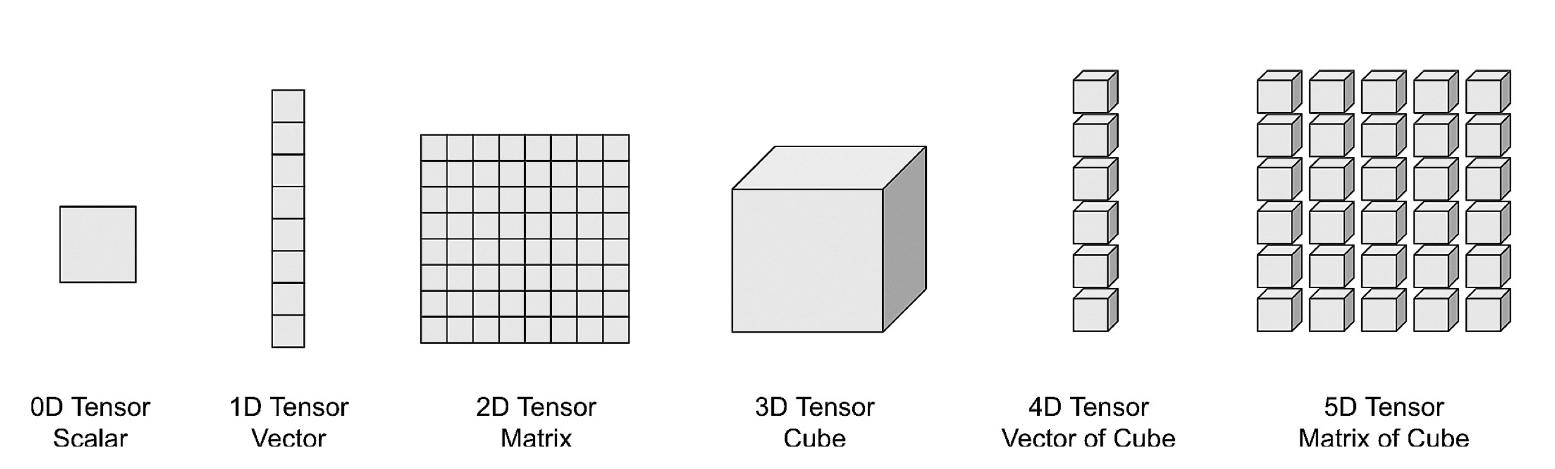

In [49]:
# 0차원값 -> 스칼라 scalar
# 1차원 배열 -> 백터 vector
# 2차원 배열 -> matrix
# 3차원 배열 -> cube
# n차원...
from IPython.display import Image
Image('/content/drive/MyDrive/cloud_ai/share/2.데이터분석/res/tensor_style.jpeg')


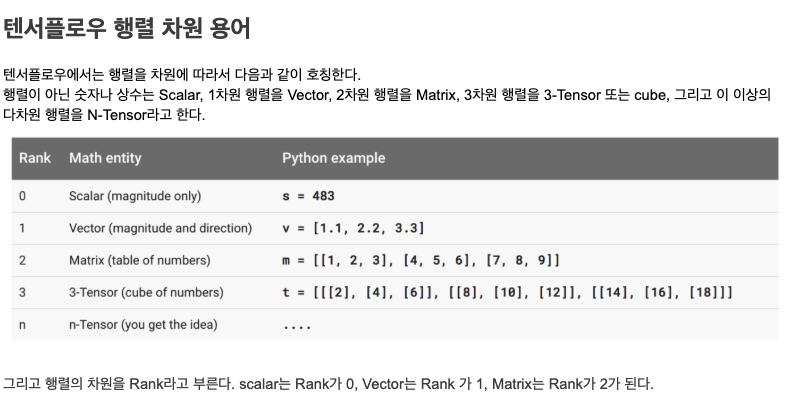

In [50]:
Image('/content/drive/MyDrive/cloud_ai/share/2.데이터분석/res/텐서용어.png')

In [51]:
# 배열과 스칼라 간의 연산
print( data )
print( '-'*100 )
print( data + 10 ) # 스칼라 값이 모든 맴버들에 접근해서 각각 10을 더한다
print( '-'*100 )
print( data - 10 ) # 스칼라 값이 모든 맴버들에 접근해서 각각 10을 뺀다
print( '-'*100 )
print( data * 10 ) # 스칼라 값이 모든 맴버들에 접근해서 각각 10을 곱한다
print( '-'*100 )
print( data / 10 ) # 스칼라 값이 모든 맴버들에 접근해서 각각 10을 나눈다

[[-1.7662947  -1.22708324  1.40324923]
 [-1.36133527 -0.01821783 -1.90808669]]
----------------------------------------------------------------------------------------------------
[[ 8.2337053   8.77291676 11.40324923]
 [ 8.63866473  9.98178217  8.09191331]]
----------------------------------------------------------------------------------------------------
[[-11.7662947  -11.22708324  -8.59675077]
 [-11.36133527 -10.01821783 -11.90808669]]
----------------------------------------------------------------------------------------------------
[[-17.66294702 -12.27083243  14.03249235]
 [-13.61335272  -0.1821783  -19.08086692]]
----------------------------------------------------------------------------------------------------
[[-0.17662947 -0.12270832  0.14032492]
 [-0.13613353 -0.00182178 -0.19080867]]


In [52]:
# 배열대 배열간의 연산
# 같은 크기면 단순 연산은 문제 없다 
# 다른 크기면 => 브로드케스팅에 부합되면 처리해준다
data - data
# 같은 자리에 있는 요소들끼리 연산함

array([[0., 0., 0.],
       [0., 0., 0.]])

In [53]:
data + data, data * data, data / data

(array([[-3.5325894 , -2.45416649,  2.80649847],
        [-2.72267054, -0.03643566, -3.81617338]]),
 array([[3.11979697e+00, 1.50573328e+00, 1.96910841e+00],
        [1.85323372e+00, 3.31889335e-04, 3.64079482e+00]]),
 array([[1., 1., 1.],
        [1., 1., 1.]]))

In [54]:
# 순수하게 데이터가 차지하는 크기 체크
import sys
data.nbytes, sys.getsizeof(data), data.dtype, data.shape
# float64 => 8byte * 2 * 3 = 48
# 배열의 순수 크기는 nbytes로 체크

(48, 168, dtype('float64'), (2, 3))

# 배열의 타입

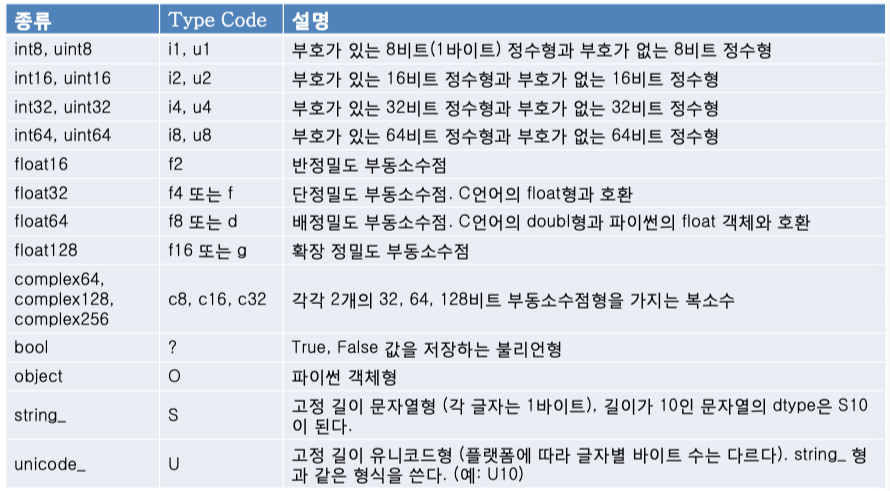

In [55]:
Image('/content/drive/MyDrive/cloud_ai/share/2.데이터분석/res/넘파이타입.png')

In [56]:
# 배열 타입 -> 데이터의 타입을 따라간다? -> ok
arr = np.array( [1,2,3])
arr.dtype

dtype('int64')

In [57]:
# 배열 타입 -> 생성할때 지정
arr = np.array( [1,2,3], dtype=np.float64 )
arr.dtype

dtype('float64')

In [58]:
# 배열 타입 -> 생성할때 지정 -> 단축표현(type code)
# u4 => uint32 => 0 ~ 2^32 -1 
# int32 => -2^(32-1) ~ 2^(32-1) -1 
# -2^(n-1) ~ 2^(n-1) -1 
arr = np.array( [1,2,3], dtype='u4' )
arr.dtype

dtype('uint32')

In [59]:
# 생성후 타입변경 astype()
tmp = arr.astype( np.int64 ) # 원본을 카피해서 타입을 바꿔서 리턴
tmp.dtype

dtype('int64')

In [60]:
arr.dtype

dtype('uint32')

- 타입변경, 명시적, 암묵적
- 작은 타입이 큰 타입으로 가면 => 정보손실 X  => 암묵적 (int8 -> int16)
- 큰 타입이 작은 타압으로가면 => 정보손실 O(할수있다) => 명시적 강제 (int16->int8)
- 값의 최대값 체크 -> 특정 타입으로 변경시 손실 있는지 검토

# 배열의 기초 연산

- 배열의 모양이 같거나, 브로드 캐스팅 허용되면 OK

In [61]:
arr = np.arange(1, 7).reshape( (2, 3) )
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [62]:
print(arr + arr, arr - arr, arr * arr, arr / arr)

[[ 2  4  6]
 [ 8 10 12]] [[0 0 0]
 [0 0 0]] [[ 1  4  9]
 [16 25 36]] [[1. 1. 1.]
 [1. 1. 1.]]


# 데이터 추출(인덱싱, 슬라이싱)

- 인덱싱 : 차원축소하면서 데이터 추출
- 슬라이싱 : 차원유지하면서 데이터 추출

## 인덱싱

In [63]:
arr, arr.shape, arr.ndim, arr.dtype

(array([[1, 2, 3],
        [4, 5, 6]]), (2, 3), 2, dtype('int64'))

In [64]:
# 변수[ 인덱스 ]
arr[ 0 ], arr[ 0 ][-1]

(array([1, 2, 3]), 3)

In [65]:
# 배열의 차원을 묘사하면서 추출하는 방식  > 뒤에 나오는 팬시 인덱싱 형식과 유사
# 스칼라(값) 3을 추출하시오
# arr[ 1차원인덱싱 , 2차원인덱싱 ] => 인덱싱 2회 => 스칼라
arr[ 0 , -1 ]

3

## 슬라이싱

- 변수[ 시작인덱스: 끝인덱스: 스텝 ] 

In [66]:
# 원본카피
arr, arr[:]

(array([[1, 2, 3],
        [4, 5, 6]]), array([[1, 2, 3],
        [4, 5, 6]]))

In [67]:
arr = np.arange( 16 ).reshape( (2,8) )
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15]])

In [68]:
# 다차원 슬라이싱 -> 변수[ 1차원슬라이싱 , 2차원슬라이싱, ...]
arr[ :-1 , 1:1+3 ]
# 1, 2, 3이 맴버로 존재하는 2차원 배열(차원유지)을 추출하시오


array([[1, 2, 3]])

In [69]:
# 이웃한 값들를 추출한다 => 슬라이싱, 인덱싱
# 2차원, [[3,4], [11,12]] 이렇게 나오겟끔 추출하시오 (2,2)
arr[ : , 3:3+2 ]

array([[ 3,  4],
       [11, 12]])

In [70]:
# 인덱싱, 슬라이싱 겹합 => 1차원
arr[ 0 , 3:3+2 ]

array([3, 4])

## 블리언 인덱싱

- 조건식을 이용 데이터를 추출
- 조건식 => True/False => 추출(참만)
- 데이터가 이웃하지 않아도 추출된다

In [71]:
arr = np.random.randn( 4, 10 )
arr

array([[-2.4194137 ,  1.00563566, -0.07164958, -0.10544649,  0.63262749,
        -0.3894694 ,  0.62282238, -1.70689806,  1.04822084,  1.15232545],
       [-1.98969642, -0.01318764,  0.16880908,  1.0958046 , -0.84186671,
        -0.25613348, -0.57260218,  0.13337621, -1.08191672,  0.31948202],
       [-0.09297138,  1.0158034 ,  0.34402121, -0.33805682,  0.41829419,
         0.7790104 , -0.30116371, -0.96915195, -0.98645071,  0.68890302],
       [-0.28042334,  0.90645646, -0.39748499,  0.27783936,  1.0812292 ,
         0.17396014, -2.12999505, -1.41816954,  0.87118899,  0.81299771]])

In [72]:
arr > 0 # 배열의 모든 모든 맴버들에 일일이 가서 0보다 크니? 비교한다
# 맴버가 수치인 배열 => 맴버가 블리언인 배열 변경된다 => 이진 데이터(0 or 1)를 가진 배열

array([[False,  True, False, False,  True, False,  True, False,  True,
         True],
       [False, False,  True,  True, False, False, False,  True, False,
         True],
       [False,  True,  True, False,  True,  True, False, False, False,
         True],
       [False,  True, False,  True,  True,  True, False, False,  True,
         True]])

In [73]:
# 배열[ 조건식 ] => 모든 구성원들 자리에 참이랑 매칭되는 값들은 모두 모아서 1차원 1배열로 리턴
arr[ arr > 0 ]

array([1.00563566, 0.63262749, 0.62282238, 1.04822084, 1.15232545,
       0.16880908, 1.0958046 , 0.13337621, 0.31948202, 1.0158034 ,
       0.34402121, 0.41829419, 0.7790104 , 0.68890302, 0.90645646,
       0.27783936, 1.0812292 , 0.17396014, 0.87118899, 0.81299771])

In [74]:
# | => or
# & => and
# (조건) 비트연산자(|, &, ^, ....) (조건)
# 배열[ () | () ] ,   배열[ () & () ]
arr[ (arr>1) | (arr<0) ]

array([-2.4194137 ,  1.00563566, -0.07164958, -0.10544649, -0.3894694 ,
       -1.70689806,  1.04822084,  1.15232545, -1.98969642, -0.01318764,
        1.0958046 , -0.84186671, -0.25613348, -0.57260218, -1.08191672,
       -0.09297138,  1.0158034 , -0.33805682, -0.30116371, -0.96915195,
       -0.98645071, -0.28042334, -0.39748499,  1.0812292 , -2.12999505,
       -1.41816954])

In [75]:
# 원소가 음수인 값들을 모두 0으로 초기화 하라 (ex) 0이하는 결측치이다 => 0으로 맞춰라)
# 참으로 해석되는 맴버들은 모두 0으로 변경
arr[ arr < 0 ] = 0
arr

array([[0.        , 1.00563566, 0.        , 0.        , 0.63262749,
        0.        , 0.62282238, 0.        , 1.04822084, 1.15232545],
       [0.        , 0.        , 0.16880908, 1.0958046 , 0.        ,
        0.        , 0.        , 0.13337621, 0.        , 0.31948202],
       [0.        , 1.0158034 , 0.34402121, 0.        , 0.41829419,
        0.7790104 , 0.        , 0.        , 0.        , 0.68890302],
       [0.        , 0.90645646, 0.        , 0.27783936, 1.0812292 ,
        0.17396014, 0.        , 0.        , 0.87118899, 0.81299771]])

## 팬시 인덱싱

- 비연속 데이터를 추출할때 유용하다
- 이녀석, 저녀석,.....  추출
- 인덱스로 표현

In [76]:
arr = np.arange(32).reshape(8,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [77]:
# 1차원에서 인덱스 기준으로 4개 뽑아서 새로운 순서대로 배치 하여 추출, 차원유지
arr[ [3,1, 0, 4] ]

array([[12, 13, 14, 15],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3],
       [16, 17, 18, 19]])

In [78]:
# 좌표 찍기 , 값을 직접 지정
arr[ [3,1, 0, 4], [2,1,3,0]]

array([14,  5,  3, 16])

In [79]:
#arr[ [3,1, 0, 4] ][ :, [2,1,3,0]]
arr[ [3,1, 0, 4] ][ : , [2,1,3,0] ] 
# 2차원 데이터는 모두 나오고 :
# 그 순서들은 열거한대로 재조합한다 [2,1,3,0]

array([[14, 13, 15, 12],
       [ 6,  5,  7,  4],
       [ 2,  1,  3,  0],
       [18, 17, 19, 16]])

In [80]:
# 그중에 한놈을 제외 => 0번 제외
arr[ [3,1, 0, 4] ][ : , [2,1,3] ] 

array([[14, 13, 15],
       [ 6,  5,  7],
       [ 2,  1,  3],
       [18, 17, 19]])

# 배열의 기타 연산

- 유용하게 사용하는 것들

In [81]:
# xxxx? 도움말(코랩에서)
arr, arr.shape?

In [82]:
# 축변경  (8,4) => (4,8), 1차원과 2차원 맞교환
# T : 2차원 데이터에서 유리(사용 빈도 높다)
arr.T, arr.T.shape

(array([[ 0,  4,  8, 12, 16, 20, 24, 28],
        [ 1,  5,  9, 13, 17, 21, 25, 29],
        [ 2,  6, 10, 14, 18, 22, 26, 30],
        [ 3,  7, 11, 15, 19, 23, 27, 31]]), (4, 8))

In [83]:
# 유사기능
# 다차원적으로 차원 변경 유용
# 그냥 사용하면 T
arr.transpose()

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

In [84]:
# 1번축과 0번축을 맞교환해라
arr.transpose( (1,0) )

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

In [85]:
arr = np.arange(24).reshape( (2,3,4) )
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [86]:
# (2,3,4) -> (4,3,2) 
# T 대칭적인 축변경
arr.T.shape, arr.T

((4, 3, 2), array([[[ 0, 12],
         [ 4, 16],
         [ 8, 20]],
 
        [[ 1, 13],
         [ 5, 17],
         [ 9, 21]],
 
        [[ 2, 14],
         [ 6, 18],
         [10, 22]],
 
        [[ 3, 15],
         [ 7, 19],
         [11, 23]]]))

In [87]:
# 원본 shape (2,3,4)
# 0번축 2, 1번축 3, 2번축 4

# 이런 원본의 축을 다음 순서대로 재배치 => (2, 0, 1) => shape(4, 2, 3)으로 변경

# (2,3,4) => (4, 2, 3)
# 2번축을 맨앞으로, 0번축을 그다음, 1번축을 마지막에 배치 => shape 계산후 축이동
arr.transpose( (2,0,1) ).shape,  arr.transpose( (2,0,1) )

((4, 2, 3), array([[[ 0,  4,  8],
         [12, 16, 20]],
 
        [[ 1,  5,  9],
         [13, 17, 21]],
 
        [[ 2,  6, 10],
         [14, 18, 22]],
 
        [[ 3,  7, 11],
         [15, 19, 23]]]))

# 유니버셜 함수(넘파이 계열)

- **np.xxx()**
- 배열.xxxx() <- 베열의 맴버함수
- 통계, 수학, 과학 , 선형대수, 연산,...
- **차후, 기초 통계 및 분석기법시 등장**
  - 통계, 수학 함수
- **딥러닝시**
  - 선형대수 함수

## 선형대수 (부분만 체크)

## 중요연산

## 브로드케스팅

- 행렬 연산시 적용 -> 딥러닝시 주로 등장